In [1]:
!pip install pyod pandas numpy matplotlib


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 163.8/163.8 kB 3.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pyod: filename=pyod-2.0.1-py3-none-any.whl size=193267 sha256=a9f6a99b2709b293adb6df35f8aa2d46a8257a25d89fb8bbff53744cee13a7d5
  Stored in directory: /root/.cache/pip/wheels/94/75/88/b853cf33b0053b0a001dca55b74d515048b7656e736364eb57
Successfully built pyod


In [2]:
import pandas as pd

# Load a sample dataset from NAB (e.g., 'realKnownCause/ambient_temperature_system_failure.csv')
url = "https://raw.githubusercontent.com/numenta/NAB/master/data/realKnownCause/ambient_temperature_system_failure.csv"
data = pd.read_csv(url, parse_dates=['timestamp'])

# Display the first few rows of the dataset
data.head()


,timestamp,value
0,2013-07-04 00:00:00,69.880835
1,2013-07-04 01:00:00,71.220227
2,2013-07-04 02:00:00,70.877805
3,2013-07-04 03:00:00,68.959400
4,2013-07-04 04:00:00,69.283551


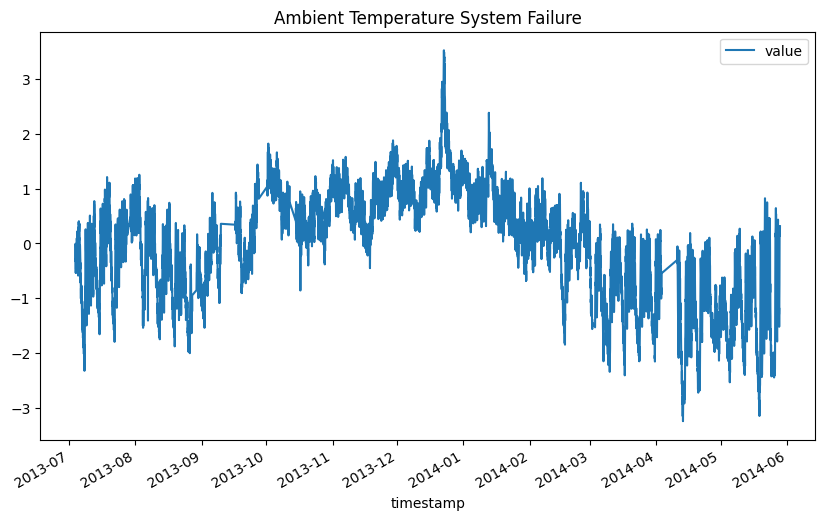

In [3]:
# Set the timestamp as the index
data.set_index('timestamp', inplace=True)

# Normalize the data
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
data['value'] = scaler.fit_transform(data[['value']])

# Plot the data
import matplotlib.pyplot as plt

data.plot(figsize=(10, 6))
plt.title("Ambient Temperature System Failure")
plt.show()


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but IsolationForest was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but IsolationForest was fitted without feature names
  warnings.warn(


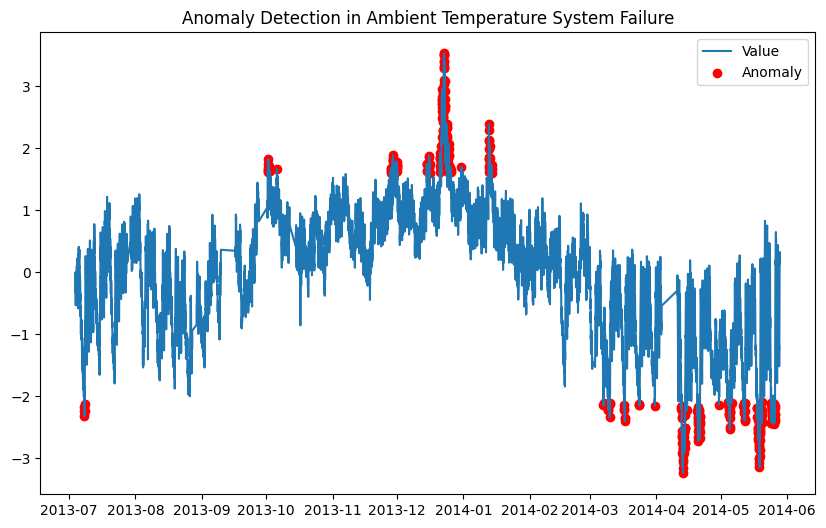

In [4]:
from pyod.models.iforest import IForest

# Initialize the Isolation Forest model
model = IForest(contamination=0.05)  # Assume 5% contamination

# Fit the model
model.fit(data[['value']])

# Get the anomaly scores and predictions
data['anomaly_score'] = model.decision_function(data[['value']])
data['anomaly'] = model.predict(data[['value']])

# Plot the results
fig, ax = plt.subplots(figsize=(10, 6))
ax.plot(data.index, data['value'], label='Value')
ax.scatter(data[data['anomaly'] == 1].index, data[data['anomaly'] == 1]['value'], color='red', label='Anomaly')
plt.title("Anomaly Detection in Ambient Temperature System Failure")
plt.legend()
plt.show()


In [5]:
# Calculate evaluation metrics (e.g., precision, recall)
from sklearn.metrics import precision_score, recall_score

# Assume the dataset has a column 'label' where anomalies are marked as 1
true_labels = data['label'].values if 'label' in data.columns else [0] * len(data)
pred_labels = data['anomaly'].values

precision = precision_score(true_labels, pred_labels)
recall = recall_score(true_labels, pred_labels)

print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")


Precision: 0.00
Recall: 0.00


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
